# Plotting  

## Introduction

This tutorial describes **skrf's** plotting features.  If you would like to use skrf's matplotlib interface with skrf styling, start with this

In [1]:
%matplotlib inline

In [2]:
import skrf as rf

## Plotting Methods


Plotting functions are implemented as methods of the `Network` class.

* `Network.plot_s_re`
* `Network.plot_s_im`
* `Network.plot_s_mag`
* `Network.plot_s_db`
* ...
    
Similar methods exist for Impedance (`Network.z`) and Admittance Parameters (`Network.y`), 


* `Network.plot_z_re`
* `Network.plot_z_im`
* ...
* `Network.plot_y_re`
* `Network.plot_y_im`
* ...




## Smith Chart 


As a first example, load a [Network](../api/network.rst) and plot all four  s-parameters on the Smith chart.

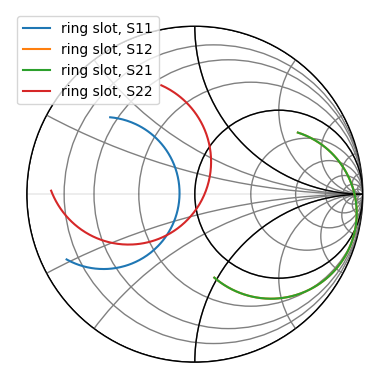

In [3]:
from skrf import Network

ring_slot = Network('data/ring slot.s2p')
ring_slot.plot_s_smith()

scikit-rf includes a convenient command to make nicer figures quick:

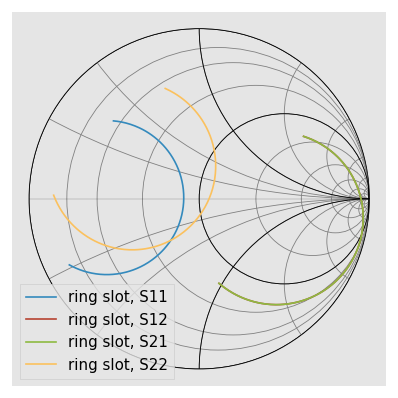

In [4]:
rf.stylely()  # nicer looking. Can be configured with different styles
ring_slot.plot_s_smith()

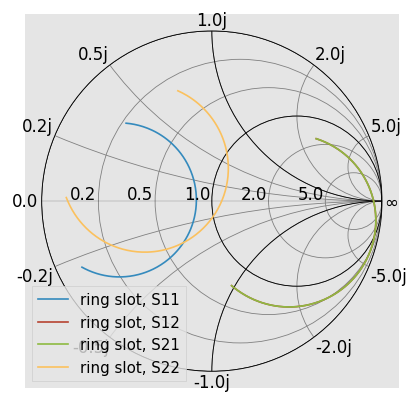

In [5]:
ring_slot.plot_s_smith(draw_labels=True)

Another common option is to draw admittance contours, instead of impedance. This is controlled through the  `chart_type` argument.

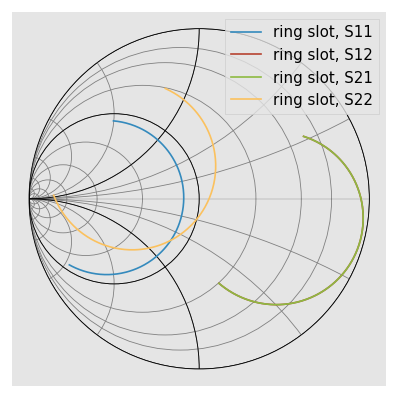

In [6]:
ring_slot.plot_s_smith(chart_type='y')

    
See `skrf.plotting.smith()` for more info on customizing the Smith Chart. 

## Complex Plane 


Network parameters can also be plotted in the complex plane without a Smith Chart through `Network.plot_s_complex`.

(-0.855165798772, 0.963732138327, -0.8760764348472001, 0.9024032182652001)

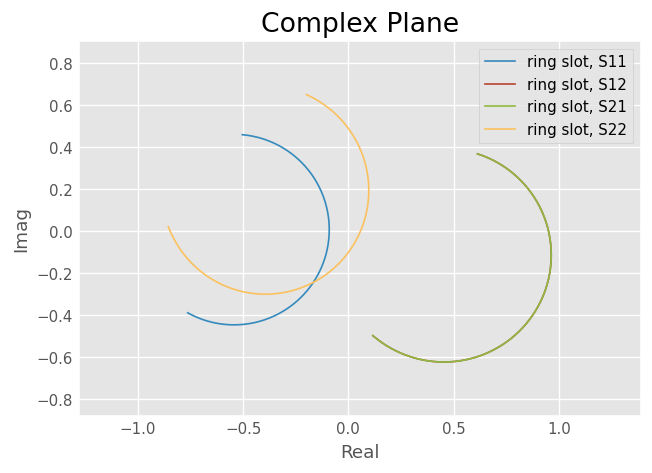

In [7]:
ring_slot.plot_s_complex()

from matplotlib import pyplot as plt
plt.axis('equal') # otherwise circles wont be circles

## Log-Magnitude 


Scalar components of the complex network parameters can be plotted vs 
frequency as well. To plot the log-magnitude of the s-parameters vs. frequency,

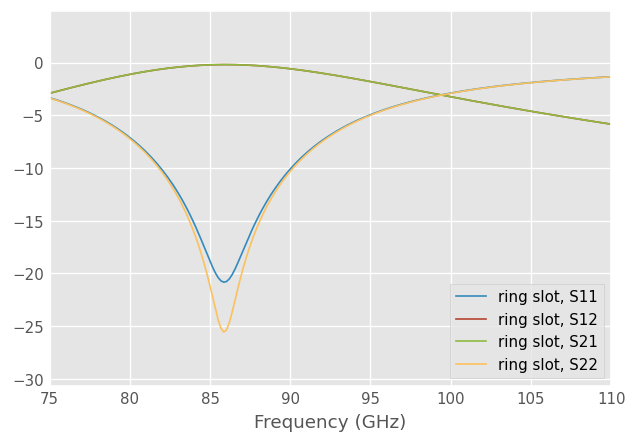

In [8]:
ring_slot.plot_s_db()

    
When no arguments are passed to the plotting methods, all parameters are plotted. Single parameters can be plotted by passing indices `m` and `n` to the plotting commands (indexing start from 0). Comparing the simulated reflection coefficient off the ring slot to a measurement, 

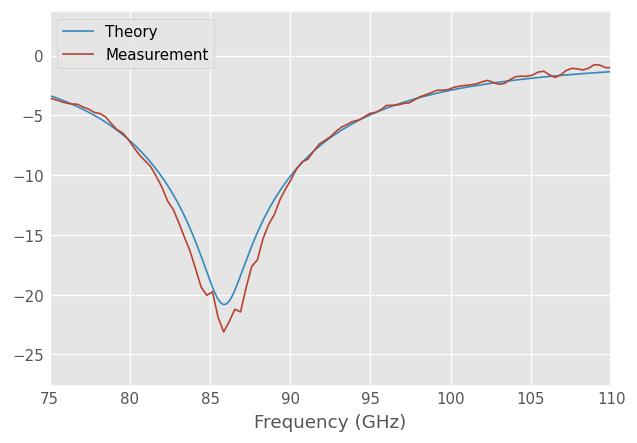

In [9]:
from skrf.data import ring_slot_meas
ring_slot.plot_s_db(m=0,n=0, label='Theory') 
ring_slot_meas.plot_s_db(m=0,n=0, label='Measurement') 

## Phase 


Plot phase, 

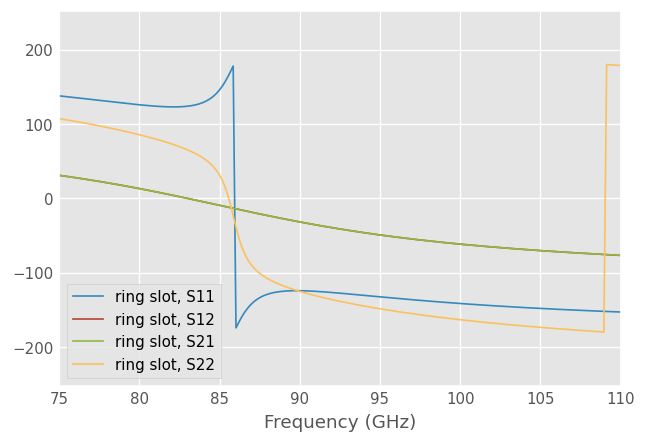

In [10]:
ring_slot.plot_s_deg()

    
Or unwrapped phase, 

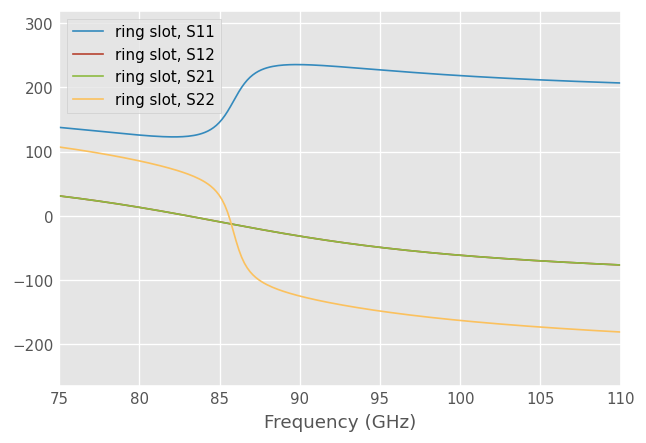

In [11]:
ring_slot.plot_s_deg_unwrap()

Phase is radian (rad) is also available

## Group Delay 

A Network has a `plot()` method which creates a rectangular plot of the argument vs frequency.  This can be used to make plots are arent 'canned'. For example group delay

Text(0.5, 1.0, 'Group Delay of Ring Slot S21')

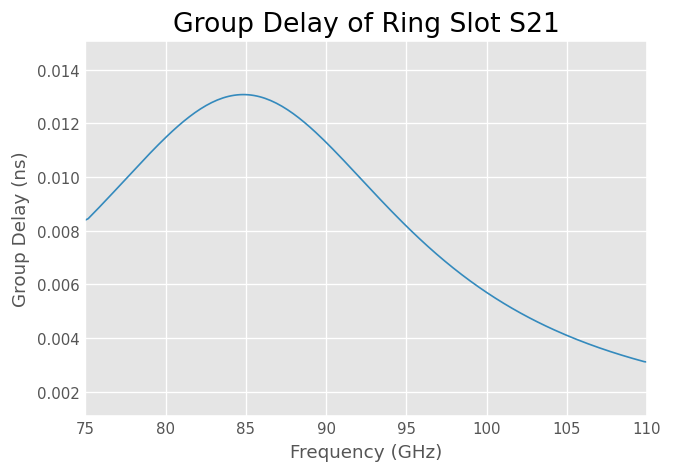

In [12]:
gd = abs(ring_slot.s21.group_delay) *1e9 # in ns

ring_slot.plot(gd)
plt.ylabel('Group Delay (ns)')
plt.title('Group Delay of Ring Slot S21')

## Impedance, Admittance 


The components the Impedance and Admittance parameters can be plotted 
similarly, 

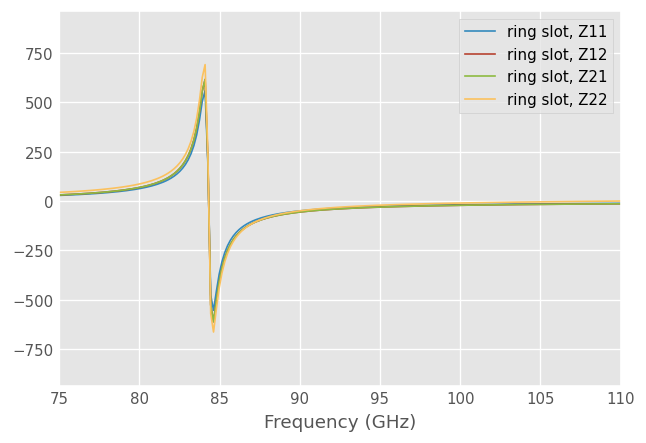

In [13]:
ring_slot.plot_z_im()

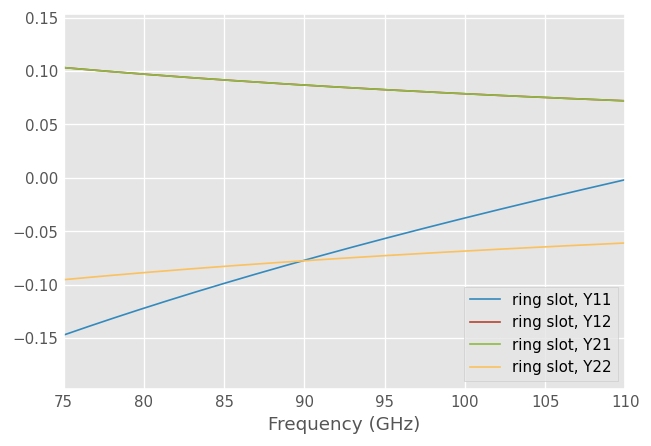

In [14]:
ring_slot.plot_y_im()

## Customizing Plots


The legend entries are automatically filled in with the Network's `Network.name`. The entry can be overridden by passing the `label` argument to the plot method.

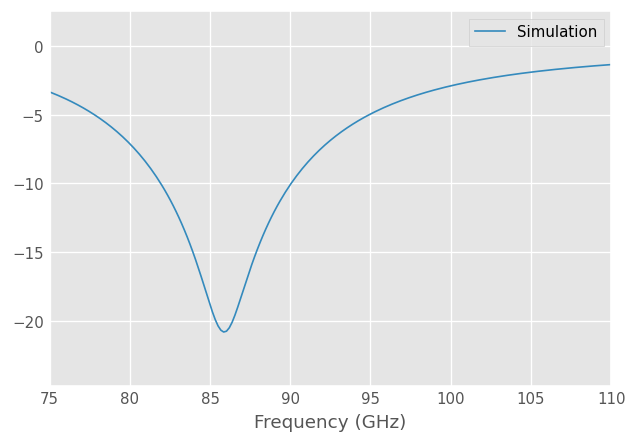

In [15]:
ring_slot.plot_s_db(m=0,n=0, label = 'Simulation')

The frequency unit used on the x-axis is automatically filled in from 
the Networks `Network.frequency.unit` attribute. To change
the label, change the frequency's `unit`.

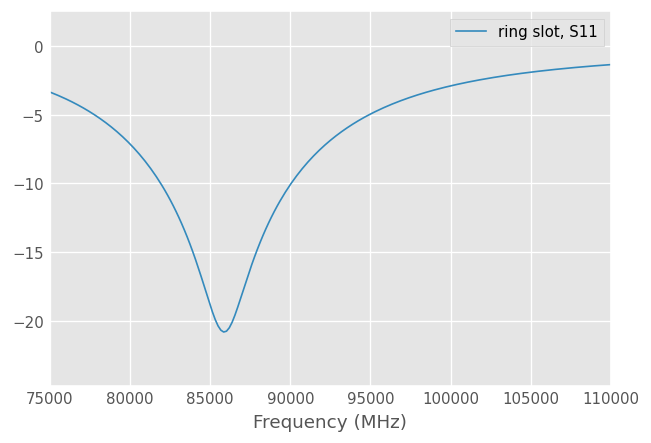

In [16]:
ring_slot.frequency.unit = 'mhz'
ring_slot.plot_s_db(0,0)

Other key word arguments given to the plotting methods are passed through to the matplotlib `matplotlib.pyplot.plot` function. 

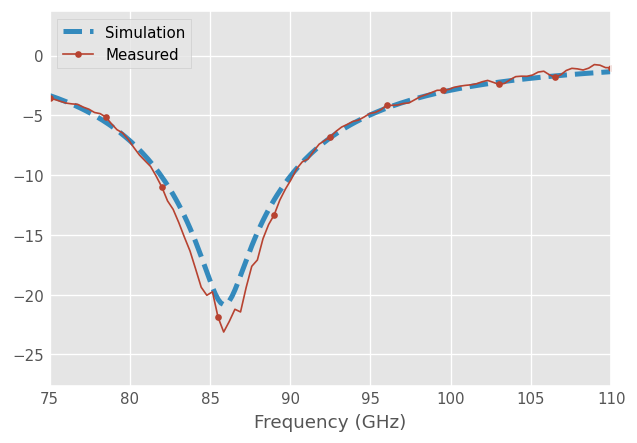

In [17]:
ring_slot.frequency.unit='ghz'
ring_slot.plot_s_db(m=0,n=0, linewidth = 3, linestyle = '--', label = 'Simulation')
ring_slot_meas.plot_s_db(m=0,n=0, marker = 'o', markevery = 10,label = 'Measured')


All components of the plots can be customized through  [matplotlib]( http://matplotlib.sourceforge.net) functions, and `styles` can be used with a context manager. 

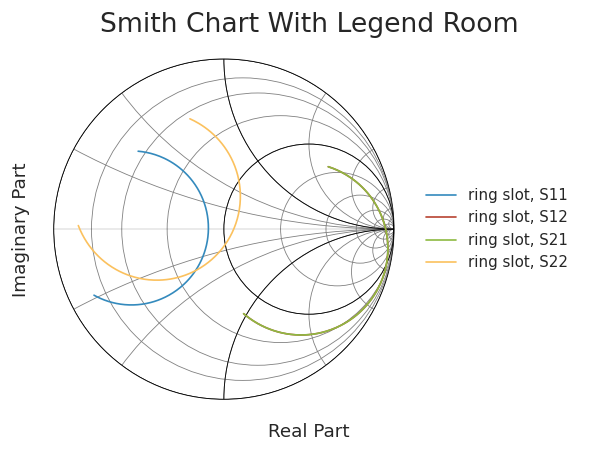

In [18]:
from matplotlib import pyplot as plt
from matplotlib import style

mpl_style = "seaborn-ticks"
mpl_style = mpl_style if mpl_style in style.available else "seaborn-v0_8-ticks"

with style.context(mpl_style):
    ring_slot.plot_s_smith()
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.title('Smith Chart With Legend Room')
    plt.axis([-1.1,2.1,-1.1,1.1])
    plt.legend(loc=5)
   

## Saving Plots

Plots can be saved in various file formats using the GUI provided by the matplotlib. However, skrf provides a convenience function, called `skrf.plotting.save_all_figs`,  that allows all open figures to be saved to disk in multiple file formats, with filenames pulled from each figure's title,

In [19]:
from skrf.plotting import save_all_figs
save_all_figs('data/', format=['png','eps','pdf'])

## Adding Markers Post Plot


A common need is to make a color plot, interpretable in greyscale print. 
The `skrf.plotting.add_markers_to_lines`  adds different markers each line in a plots *after* the plot has been made, which is usually when you remember to add them.

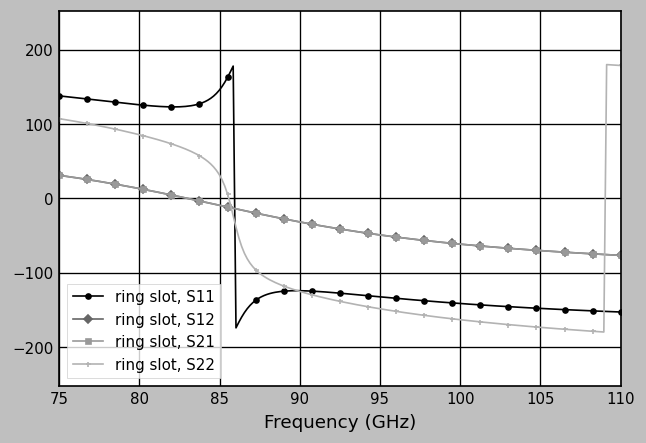

In [20]:
from skrf import plotting
with plt.style.context('grayscale'):
    ring_slot.plot_s_deg()
    plotting.add_markers_to_lines()
    plt.legend() # have to re-generate legend
